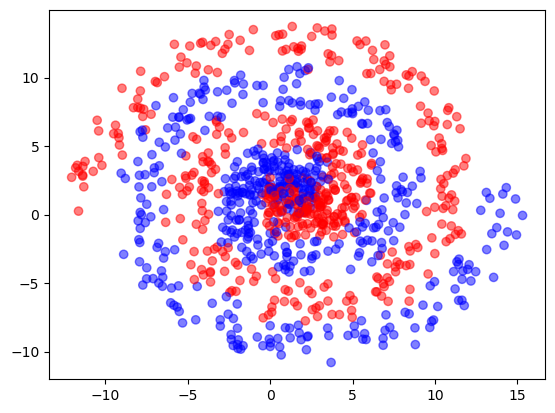

In [22]:
import make_spirals
import matplotlib.pyplot as plt
X, y = make_spirals.make_spirals(n_samples = 1000, noise = 3, random_state=13)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr, alpha=0.5)
plt.show()
df = pd.DataFrame(X, columns = ['x1', 'x2'])
df['y'] = y
df.to_csv("spirals.csv", index = False)

<AxesSubplot:xlabel='x1', ylabel='x2'>

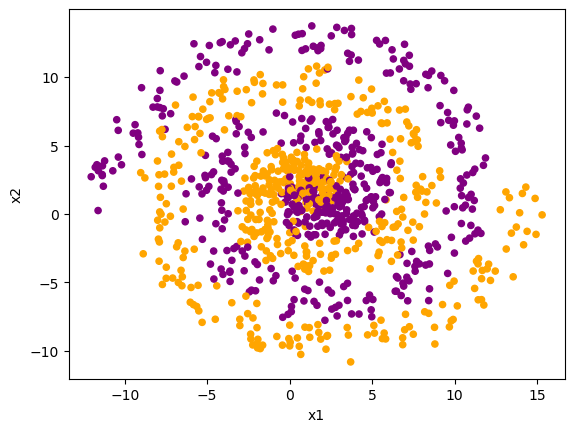

In [42]:
import pandas as pd
df = pd.read_csv("spirals.csv")
df.plot.scatter("x1", "x2", color=df["y"].map({1.0: "purple", 0.0:"orange"}))

In [44]:
from sklearn.svm import SVC

clf = SVC()

In [45]:
from sklearn.model_selection import train_test_split

X = df[['x1', 'x2']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)


In [46]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74       144
         1.0       0.64      0.78      0.71       106

    accuracy                           0.72       250
   macro avg       0.73      0.73      0.72       250
weighted avg       0.74      0.72      0.73       250



<AxesSubplot:xlabel='x1', ylabel='x2'>

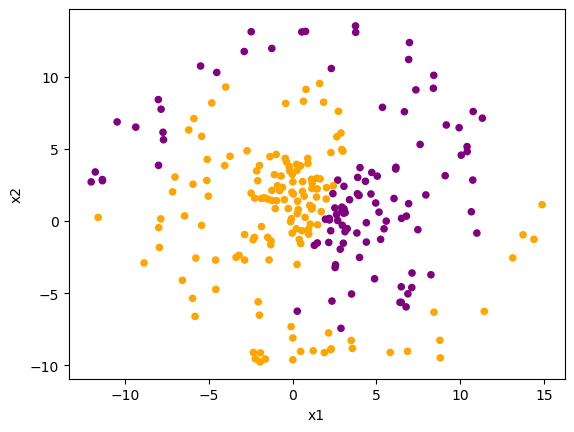

In [47]:
X_test.plot.scatter("x1", "x2", color = pd.Series(y_pred).map({1.0: "purple", 0.0:"orange"}))